## Customer Lifetime Value

## Business Problem Understanding

Perusahaan asuransi kendaraan merupakan perusahaan yang bergerak di <i>Subscription Business</i> yang berarti perusahaan mendapat pemasukan dari pengguna yang membayarkan biaya langganan secara periodik untuk jasa yang disediakan oleh perusahaan. Dalam konteks ini jasa jaminan asuransi kendaraan.<br>

Dalam <i>Subscription Business</i> ada istilah yang dikenal sebagai <b>Customer Lifetime Value</b>, istilah ini adalah perkiraan total pemasukan yang bisa didapatkan oleh perusahaan dari masa pengguna berlangganan jasa yang ditawarkan perusahaan.

### Problem Statement 

Bagi perusahaan asuransi, memprediksi <b>Customer Lifetime Value</b> dari pengguna jasanya menjadi sesuatu yang sangat krusial guna mengoptimalkan biaya yang dikeluarkan untuk mempertahankan pengguna dan juga menarik pengguna baru untuk ikut berlangganan asuransi kendaraan di perusahaan tersebut.

### Goals 

Berdasarkan masalah di atas, Machine Learning Project ini bertujuan untuk memprediksi <b>Customer Lifetime Value</b> dari berbagai jenis pelanggan, diharapkan hasil prediksi dari model Machine Learning ini dapat membantu perusahaan untuk mengidentifikasi calon pelanggan yang harus dicari dan pelanggan mana yang harus dipertahankan berdasarkan karakteristik dari dataset pelanggan yang sudah ada.

## Library 

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data 

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Dapat terlihat bahwa tidak ada data Null pada dataset yang digunakan.

In [23]:
df.duplicated().sum()

618

In [30]:
df[df.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [3]:
df.nunique()

Vehicle Class                 6
Coverage                      3
Renew Offer Type              4
EmploymentStatus              5
Marital Status                3
Education                     5
Number of Policies            9
Monthly Premium Auto        191
Total Claim Amount         3274
Income                     3625
Customer Lifetime Value    5049
dtype: int64

## Explanatory Data Analysis

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

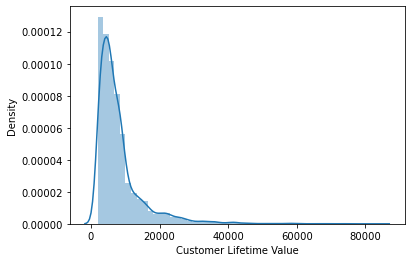

In [9]:
sns.distplot(df['Customer Lifetime Value'])

dari grafik diatas terlihat bahwa terdapat <i>Right Skewness</i> pada data <i>Customer Lifetime Value</i>

In [18]:
print('Jumlah pengguna asuransi kendaraan berdasarkan jenis kendaraan:\n{}'.format(df['Vehicle Class'].value_counts()))
print('\nJumlah pengguna asuransi kendaraan berdasarkan tipe coverage:\n{}'.format(df['Coverage'].value_counts()))

Jumlah pengguna asuransi kendaraan berdasarkan jenis kendaraan:
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: Vehicle Class, dtype: int64

Jumlah pengguna asuransi kendaraan berdasarkan tipe coverage:
Basic       3477
Extended    1704
Premium      488
Name: Coverage, dtype: int64


In [36]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


dari data yang terlihat di atas, terlihat tidak ada data yang tidak masuk akal, seperti contohnya <i>Income</i> atau <i>Total Claim Amount</i> yang bernilai negatif

#### Checking for Data Correlation 

In [6]:
df.corr()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,1.000000,0.006045,0.005554,-0.007164,0.024721
Monthly Premium Auto,0.006045,1.000000,0.636289,-0.016697,0.402297
Total Claim Amount,0.005554,0.636289,1.000000,-0.353351,0.215354
Income,-0.007164,-0.016697,-0.353351,1.000000,0.025698
Customer Lifetime Value,0.024721,0.402297,0.215354,0.025698,1.000000


## Correlation Heatmap 

<AxesSubplot:>

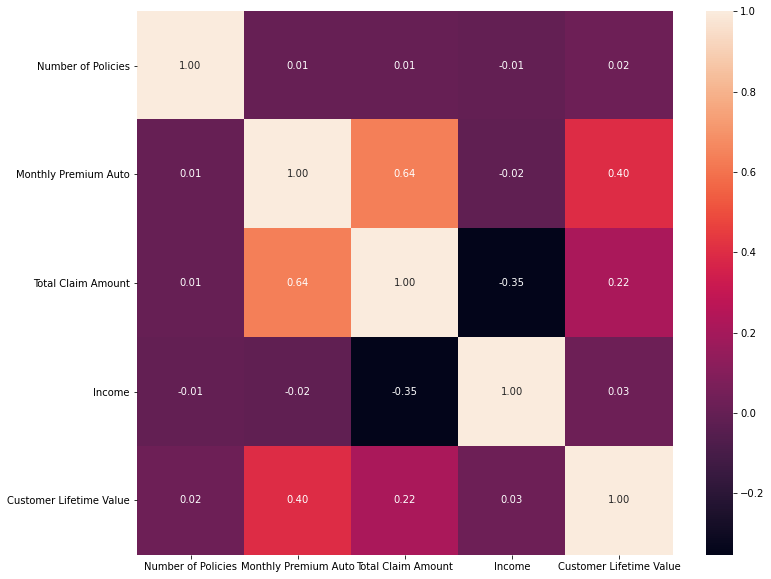

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

Dari Korelasi dapat dilihat bahwa ada korelasi yang cukup tinggi pada variable <i>Monthly Premium Auto</i> dan <i>Total Claim Amount</i>

<AxesSubplot:xlabel='Coverage', ylabel='Customer Lifetime Value'>

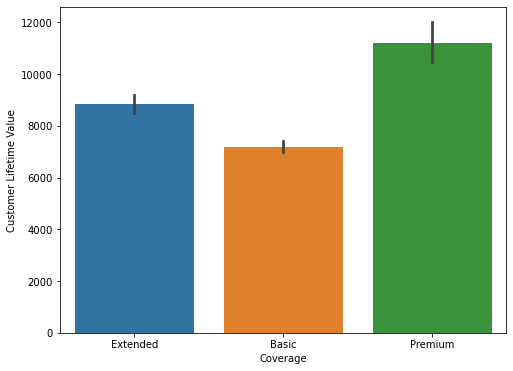

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data = df, x = 'Coverage', y = 'Customer Lifetime Value')

Dapat terlihat dari visualisasi bahwa <i>Coverage</i> Premium memiliki <i>Customer Lifetime Value</i> tertinggi dan Basic Coverage memiliki <i>Customer Lifetime Value</i> terendah

Text(0, 0.5, 'Median Price')

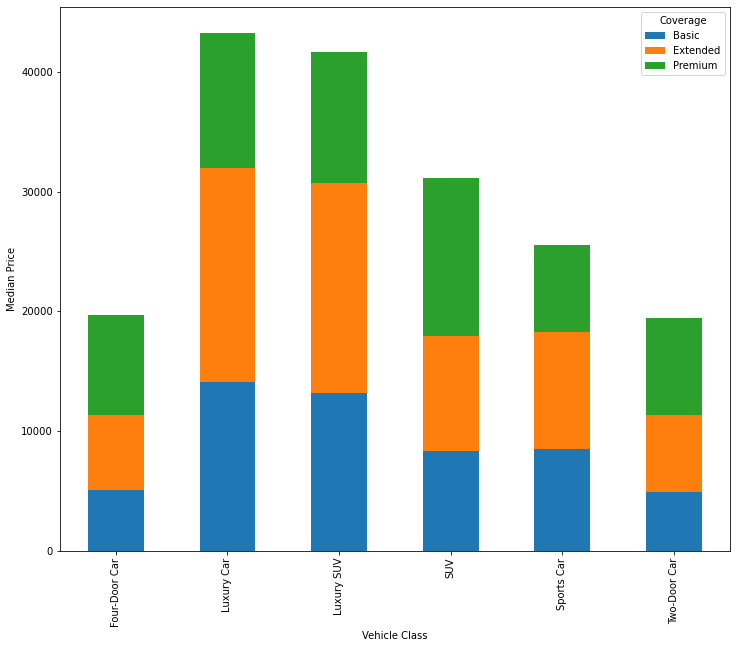

In [44]:
df_pivot = df.pivot_table(index='Vehicle Class', columns='Coverage', values='Customer Lifetime Value', aggfunc='median')

df_pivot.plot.bar(stacked=True, figsize=(12,10))
plt.ylabel('Median Price')

Dari Visualisasi diatas dapat terlihat bahwa tipe kendaraan Luxury Car dan Luxury SUV memiliki <i>Customer Lifetime Value</i>x tertinggi

## Modeling

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Encoding 

In [53]:
df.nunique()

Vehicle Class                 6
Coverage                      3
Renew Offer Type              4
EmploymentStatus              5
Marital Status                3
Education                     5
Number of Policies            9
Monthly Premium Auto        191
Total Claim Amount         3274
Income                     3625
Customer Lifetime Value    5049
dtype: int64

In [56]:
df['Education'].unique()

array(['High School or Below', 'College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

dari jumlah value unique untuk data <i>Renew Offer Type</i>,<i>EmploymentStatus</i>, dan <i>Marital Status</i> dapat kita encode dengan Onehot Encoding.<br>
sedangkan untuk <i>Vehicle Class</i>, <i>Coverage</i>, dan <i>Education</i> akan kita encode dengan Ordinal Encoding.

## Data Splitting 

In [59]:
x = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

In [83]:
x

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0
...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

## Benchmark Model

In [93]:
ordinal_mapping = [
    {'col':'Vehicle Class',
     'mapping':{ 'Four-Door Car': 1,
                'Two-Door Car': 2,
                'SUV': 3,
                'Sports Car': 4,
                'Luxury SUV': 5,
                'Luxury Car': 6}
    },
    {'col':'Coverage',
     'mapping':{'Basic':1,
                'Extended':2,
                'Premium':3}
    },
    {'col':'Education',
     'mapping':{'High School or Below':1,
                'College':2,
                'Bachelor':3,
                'Master':4,
                'Doctor':5}
    }
]

transformer = ColumnTransformer([
    ('Onehot Encoder',OneHotEncoder(drop='first'),['Renew Offer Type','EmploymentStatus','Marital Status']),
    ('Ordinal Encoder',ce.OrdinalEncoder(cols = ['Vehicle Class','Coverage','Education'], mapping=ordinal_mapping), ['Vehicle Class','Coverage','Education'])
],remainder = 'passthrough')

linreg = LinearRegression()
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor(random_state=10)
rfreg = RandomForestRegressor(random_state=10)
XGBreg = XGBRegressor(random_state=10)

models = [linreg, knnreg, treereg, rfreg, XGBreg]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

kf = KFold(n_splits=5,shuffle=True,random_state=10)

for i in models:    
    pipe_model = Pipeline([
        ('Transformer',transformer),
        ('Scaler',StandardScaler()),
        ('Model',i)
    ])
    
    cv_rmse = cross_val_score(pipe_model,x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    score_rmse.append(cv_rmse)
    mean_rmse.append(cv_rmse.mean())
    std_rmse.append(cv_rmse.std())
    
    cv_mae = cross_val_score(pipe_model,x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    score_mae.append(cv_mae)
    mean_mae.append(cv_mae.mean())
    std_mae.append(cv_mae.std())
    
    cv_mape = cross_val_score(pipe_model,x_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    score_mape.append(cv_mape)
    mean_mape.append(cv_mape.mean())
    std_mape.append(cv_mape.std())

In [94]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean RMSE': mean_rmse,
    'Std RMSE': std_rmse,
    'Mean MAE': mean_mae,
    'Std MAE': std_mae,
    'Mean MAPE': mean_mape,
    'Std MAPE': std_mape
})

,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
0,Linear Regression,-6326.321159,534.392434,-3883.053832,185.992383,-0.593552,0.020370
1,KNN Regressor,-6524.600088,393.394503,-3818.855529,192.884319,-0.556585,0.019744
2,DecisionTree Regressor,-5326.521233,687.345520,-1761.425305,226.076704,-0.129387,0.015644
3,RandomForest Regressor,-4022.975034,417.482036,-1528.481228,127.054717,-0.110450,0.006797
4,XGBoost Regressor,-4226.936796,486.319434,-1938.376796,145.784329,-0.198141,0.010836


Dari hasil <b>cross validation score</b> dapat dilihat bahwa model dasar <i>Random Forest Regressor</i> merupakan model terbaik dengan MAPE sekitar 11%

## Prediction with Benchmark Model 

In [97]:
pipe_model = Pipeline([
        ('Transformer',transformer),
        ('Scaler',StandardScaler()),
        ('Model',RandomForestRegressor(random_state=10))
    ])

pipe_model.fit(x_train, y_train)
y_pred = pipe_model.predict(x_test)

score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score_mae = mean_absolute_error(y_test, y_pred)
score_mape = mean_absolute_percentage_error(y_test, y_pred)

df_score_benchmark = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape},index=['Random Forest Regressor'])
df_score_benchmark

,RMSE,MAE,MAPE
Random Forest Regressor,4003.283588,1540.264951,0.109799


## Hyperparameter Tuning 

Dari hasil Cross Validation Score diatas, didapati bahwa model yang memiliki performa paling baik adalah Random Forest Regressor, maka kita akan melakukan Hyperparameter Tuning pada model tersebut dengan harapan kita mendapatkan hasil prediksi yang lebih baik lagi.

In [100]:
n_estimators = [100,150,200]
criterion = ['squared_error','absolute_error']
min_samples_leaf = [1,5,10]

param_grid_rf = {
    'Model__n_estimators':n_estimators,
    'Model__criterion':criterion,
    'Model__min_samples_leaf':min_samples_leaf
}

In [101]:
rfreg = RandomForestRegressor(random_state=10)

pipe_model = Pipeline([
    ('Transformer',transformer),
    ('Scaler',StandardScaler()),
    ('Model',rfreg)
])

kf = KFold(n_splits=5, shuffle=True, random_state=10)

gs_rf = GridSearchCV( pipe_model, 
                      cv=kf, 
                      param_grid = param_grid_rf, 
                      n_jobs=-1, 
                      scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                      refit='neg_root_mean_squared_error')

In [102]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot '
                                                                         'Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Ordinal '
                                                                         'Encoder',
                                                                         OrdinalEncoder(cols=['Vehicle '
                                                                                              'Class',
                                                                                              'Coverage',
                                                                                              'Education'],...
                                       ('Scaler', StandardScaler()),
                                       ('Model',
                                        RandomForestRegressor(random_state=10))]),
             n_jobs=-1,
             param_grid={'Model__criterion': ['squared_error',
                                              'absolute_error'],
                         'Model__min_samples_leaf': [1, 5, 10],
                         'Model__n_estimators': [100, 150, 200]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [106]:
pd.DataFrame(gs_rf.cv_results_).sort_values(['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error','rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__criterion,param_Model__min_samples_leaf,param_Model__n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.594576,0.123649,0.066288,0.023115,squared_error,10,150,"{'Model__criterion': 'squared_error', 'Model__...",-4563.349536,-3866.368449,...,95.846855,16,-0.108173,-0.115333,-0.113439,-0.122848,-0.120497,-0.116058,0.005203,16
8,2.524725,0.080382,0.071883,0.001446,squared_error,10,200,"{'Model__criterion': 'squared_error', 'Model__...",-4565.919030,-3869.786096,...,96.745554,17,-0.108155,-0.115335,-0.113470,-0.122910,-0.120590,-0.116092,0.005238,17
6,0.879830,0.094309,0.044780,0.022346,squared_error,10,100,"{'Model__criterion': 'squared_error', 'Model__...",-4572.971724,-3876.623353,...,95.793850,18,-0.107984,-0.115367,-0.113806,-0.122944,-0.120773,-0.116175,0.005297,18
5,1.939537,0.083349,0.050783,0.010969,squared_error,5,200,"{'Model__criterion': 'squared_error', 'Model__...",-4589.942072,-3796.903246,...,106.549928,13,-0.105862,-0.110620,-0.108411,-0.118363,-0.117890,-0.112229,0.005047,13
14,111.182732,1.674161,0.064393,0.009554,absolute_error,5,200,"{'Model__criterion': 'absolute_error', 'Model_...",-4747.508193,-3831.059814,...,117.398961,4,-0.098556,-0.099485,-0.094512,-0.110828,-0.106033,-0.101883,0.005803,4
4,1.423134,0.016562,0.044716,0.007319,squared_error,5,150,"{'Model__criterion': 'squared_error', 'Model__...",-4584.275759,-3790.275370,...,106.028312,14,-0.106152,-0.110910,-0.108443,-0.118610,-0.117998,-0.112423,0.005036,15
3,1.027504,0.048203,0.030218,0.006580,squared_error,5,100,"{'Model__criterion': 'squared_error', 'Model__...",-4580.330674,-3791.155990,...,107.515040,15,-0.105597,-0.111007,-0.108145,-0.118777,-0.118269,-0.112359,0.005319,14
13,80.390239,1.790659,0.069206,0.019415,absolute_error,5,150,"{'Model__criterion': 'absolute_error', 'Model_...",-4743.490750,-3828.769612,...,117.689450,5,-0.098997,-0.099589,-0.094993,-0.111376,-0.106341,-0.102259,0.005837,6
12,52.375456,0.508947,0.043210,0.006894,absolute_error,5,100,"{'Model__criterion': 'absolute_error', 'Model_...",-4764.143103,-3833.221442,...,119.741359,6,-0.099379,-0.099295,-0.094607,-0.111601,-0.105846,-0.102146,0.005928,5
10,85.307622,0.755613,0.073477,0.010857,absolute_error,1,150,"{'Model__criterion': 'absolute_error', 'Model_...",-4541.212787,-3841.616072,...,125.418879,9,-0.107602,-0.111477,-0.102576,-0.119353,-0.119856,-0.112173,0.006694,12


In [103]:
print('Random Forest Regressor')
print('Best_score:', gs_rf.best_score_)
print('Best_params:', gs_rf.best_params_)

Random Forest Regressor
Best_score: -3903.1896136897603
Best_params: {'Model__criterion': 'squared_error', 'Model__min_samples_leaf': 10, 'Model__n_estimators': 150}


## Predict Test Set with Hyperparameter Tuned Model 

In [110]:
best_est = gs_rf.best_estimator_
best_est.fit(x_train, y_train)

y_pred = best_est.predict(x_test)

score_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
score_mae_tuned = mean_absolute_error(y_test, y_pred)
score_mape_tuned = mean_absolute_percentage_error(y_test, y_pred)

df_score_tuned = pd.DataFrame({'RMSE': score_rmse_tuned, 'MAE': score_mae_tuned, 'MAPE': score_mape_tuned},index=['Random Forest Regressor'])
df_score_tuned

,RMSE,MAE,MAPE
Random Forest Regressor,3826.409248,1624.797295,0.115491


## Model Before and After Tuning Comparison 

#### Score before Tuning 

In [108]:
df_score_benchmark

,RMSE,MAE,MAPE
Random Forest Regressor,4003.283588,1540.264951,0.109799


#### Score After Tuning 

In [109]:
df_score_tuned

,RMSE,MAE,MAPE
Random Forest Regressor,3826.409248,1624.797295,0.115491



Terlihat adanya penurunan yang cukup signifikan pada metrics RMSE pada model setelah dilakukan tuning, namun pada terdapat sedikit kenaikan pada MAE dan MAPE. Dapat dikatakan bahwa setelah dilakukan Hyperparameter Tuning, model memiliki performa yang lebih baik.

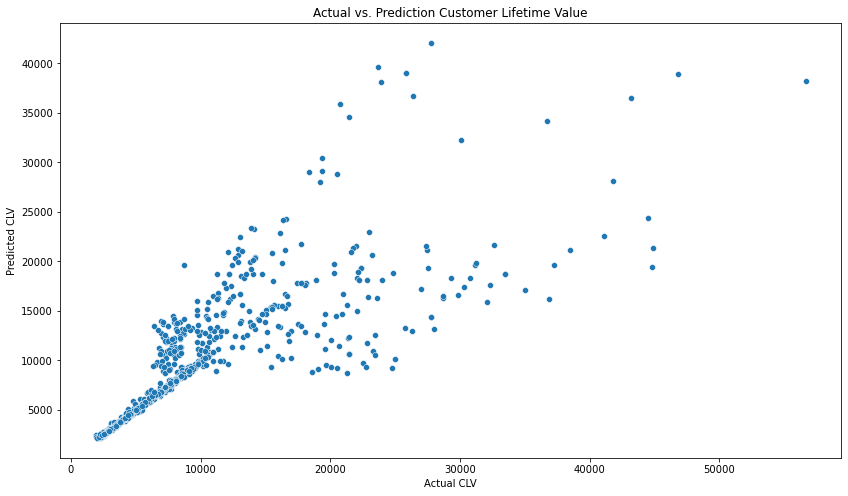

In [118]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Customer Lifetime Value', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV');

## Feature Importances 

<AxesSubplot:title={'center':'Feature Importances'}>

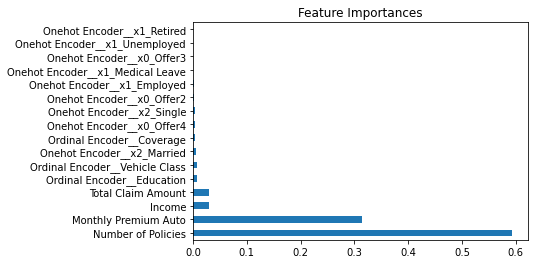

In [117]:
feature_importances = pd.Series(best_est['Model'].feature_importances_,transformer.get_feature_names()).sort_values(ascending=False)
feature_importances.plot(kind='barh', title='Feature Importances')

## Conclusion 

Berdasarkan Feature Importances dari model <i>Random Forest Regressor</i>, fitur <b>Number of Policies</b> dan <b>Monthly Premium Auto</b> adalah fitur yang paling berpengaruh terhadap <b>Customer Lifetime Value</b>. <br>
Metrics evaluasi yang digunakan adalah <b>RMSE</b>, <b>MAE</b>, dan <b>MAPE</b>. Dari hasil <b>MAPE</b> yang didapatkan pada model yang telah di tuning, kita mendapatkan MAPE sebesar 11.5%. Artinya model kita dapat memprediksi Customer Lifetime Value dari pelanggan dengan rata-rata meleset sebesar 11.5%.

## Recommendation 

1. Apabila memungkinkan, lakukan penambahan fitur-fitur yang memiliki korelasi yang cukup tinggi dengan target variable <i>Customer Lifetime Value</i>
2. Penambahan data-data dengan <i>Customer Lifetime Value</i> yang bernilai diatas 20000. Karena dari plot data Actual vs Prediction dapat dilihat bahwa model kita dapat memprediksi data-data dengan <i>Customer Lifetime Value</i> dibawah 20000 dengan cukup baik, dan model kesulitan memprediksi data-data dengan <i>Customer Lifetime Value</i> diatas 20000.

#### Save Model 

In [120]:
import pickle

estimator = gs_rf.best_estimator_
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('Customer_Lifetime_Value.sav', 'wb'))